# Financial Computing III: Homework 5
Group:
<ul>
    <li>Daniel Rojas Coy</li>
    <li>Harveen Oberoi</li>
    <li>Lucas Duarte Bahia</li>
    <li>Jordan Giebas</li>
</ul>

In [98]:
# Import statements given, I'll probably alter
import math as m
import numpy as np
import pandas as pd
import pandas_datareader as web

from scipy.stats import describe

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Part (a)
Observe the average below

In [99]:
(0.70+0.60+0.10-0.10-0.30)/5

0.19999999999999996

The values in the sum in represent our per-period return, notice this is monotonically decreasing. Despite this, we still have a 20% gain on (arithmetic) average. This is why they can be misleading and a problem.

## Part (b)
Create a pandas Series named s1 of 500,000 random values drawn from a standard normal distribution.  Compute and display the minimum, maximum, mean, standard deviation, skew, and excess kurtosis of s1.  Is there evidence that the values were not drawn from a standard normal distribution?


In [100]:
s1 = pd.Series(np.random.standard_normal(size=500000))

The evidence is pretty ample the the RVs were drawn from a standard normal distribution. **Note** The mean and variance are nearly 0 and 1 respectively, the skew and Kurtosis are nearly 0 as they should be, and the range of values is nearly within $\pm$ 3 standard deviations

In [101]:
stats = describe(s1)

print("-------Summary Statistics-------")
print("Min:{:>12}".format(round(stats[1][0],3)))
print("Max:{:>12}".format(round(stats[1][1],2)))
print("Mean:{:>15}".format(round(stats[2],6)))
print("Variance:{:>8}".format(round(stats[3],3)))
print("Skew:{:>12}".format(round(stats[4],3)))
print("Kurtosis:{:>8}".format(round(stats[5],3)))

-------Summary Statistics-------
Min:      -4.986
Max:        4.48
Mean:       0.001431
Variance:     1.0
Skew:       0.001
Kurtosis:  -0.019


## Part (c)
As another way of checking normality, a qqplot (quantile-quantile plot) should show sample vs. theoretical quantile values on a straight line.  The statsmodels  module provides such a plot that will work with a Series as data.  Try it out, then close the plot window to continue

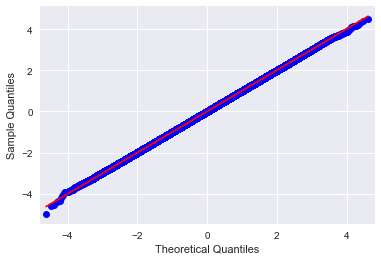

In [102]:
import statsmodels.api as sm
sm.qqplot(s1, line='q')       # line thru quartiles
plt.show()

Yup, it's definitely Gaussian.

## Part (d)
Get a list named d30tick of the ticker symbols for the current Dow 30 stocks from this web site: https://www.cnbc.com/dow-components/ <br>
Display `d30tick`.  For some reason, `get_data_morningstar()` is unable to download data for 'DWDP' (DowDupont).  You can get the integer index of an item in a list using the `.index()` method.  Delete 'DWDP' from d30tick and add 'BRK.A' instead.  Display the modified d30tick.


In [103]:
d30tick = pd.read_html('https://www.cnbc.com/dow-components/')[0].iloc[:,0].tolist()
d30tick.remove('DWDP'); d30tick.append('BRK.A')

In [104]:
d30tick

['AXP',
 'AAPL',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'XOM',
 'GE',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'JPM',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UNH',
 'UTX',
 'VZ',
 'V',
 'WMT',
 'DIS',
 'BRK.A']

## Part (e)
Create a DataFrame named d30PrevYrClose of just the closing ('Close') prices for every stock in d30tick since April 20, 2017.  (We are ignoring dividends and splits, because we don’t have access to adjusted closing price from Morningstar.)  Display the first 5 columns of the first 10 rows of d30PrevYrClose.


In [105]:
# Get the stock data for the list of stocks above
stock_data = web.get_data_morningstar(d30tick, start='2017-04-20', end='2018-04-20')

# Stealing Code from Ostlund: Lecture 5 pt.2 slide 11
d30PrevYrClose = pd.DataFrame({})  # empty>>> 
for t in stock_data.index.levels[0]:        
    d30PrevYrClose[t] = stock_data.loc[t, 'Close']

In [106]:
d30PrevYrClose.iloc[:10,:5]

,AAPL,AXP,BA,BRK.A,CAT
Date,,,,,
2017-04-20,142.44,80.02,179.30,247200.05,94.66
2017-04-21,142.27,79.59,180.38,245550.00,94.32
2017-04-24,143.64,80.45,182.06,248850.00,96.81
2017-04-25,144.53,80.63,183.51,251231.00,104.42
2017-04-26,143.68,80.52,181.71,251351.00,104.66
2017-04-27,143.79,80.33,183.22,249950.00,102.68
2017-04-28,143.65,79.25,184.83,247780.00,102.26
2017-05-01,146.58,79.23,182.39,248270.00,102.00
2017-05-02,147.51,79.54,183.44,249010.00,101.51


## Part (f)
Create a DataFrame named `d30logret` of log returns of the `d30tick` stocks.  Display the first 4 columns of the first 10 rows of d30logret. 

In [107]:
d30logret = np.log(d30PrevYrClose/d30PrevYrClose.shift(1))
d30logret.iloc[:10,:4] # Display

,AAPL,AXP,BA,BRK.A
Date,,,,
2017-04-20,NaN,NaN,NaN,NaN
2017-04-21,-0.001194,-0.005388,0.006005,-0.006697
2017-04-24,0.009584,0.010747,0.009271,0.013350
2017-04-25,0.006177,0.002235,0.007933,0.009523
2017-04-26,-0.005898,-0.001365,-0.009857,0.000478
2017-04-27,0.000765,-0.002362,0.008276,-0.005589
2017-04-28,-0.000974,-0.013536,0.008749,-0.008720
2017-05-01,0.020192,-0.000252,-0.013289,0.001976
2017-05-02,0.006325,0.003905,0.005740,0.002976


## Part (g)
What is the shape of d30logret?  You will notice that d30logret excludes data for weekends but not for holidays.  A holiday is easy to recognize in d30logret, because the stock prices are identical to the previous day’s prices, and hence the log return for every stock on the holiday is 0.  Create a DataFrame named d30lrnh that is a subset of d30logret with the initial NaN row and all holidays removed.  What is the shape of d30lrnh?  (You should have 252 trading days of values.)


In [108]:
d30logret.shape

(262, 30)

The initial `shape` is (262,30): i.e., 262 dates and 30 companies.

In [109]:
d30lrnh = d30logret[~(d30logret==0).all(axis=1)]
d30lrnh.shape

(253, 30)

253 - the first `nan` row = 252 

## Part (h)
From d30lrnh, display (as Series values) the per-column mean, standard deviation, skew, and excess kurtosis, in each case in ascending value order.  Interpret what is meant by each of these statistics, and what is meant by lower or higher values.  Display qqplots of log returns for the stocks with the lowest and highest excess kurtosis values.  Interpret these plots.


In [110]:
print("-----Display Column Means-----")
d30lrnh.mean().sort_values()

-----Display Column Means-----


GE      -0.002910
PG      -0.000758
DIS     -0.000538
IBM     -0.000450
MRK     -0.000243
XOM     -0.000100
VZ      -0.000042
KO       0.000059
JNJ      0.000153
UTX      0.000306
PFE      0.000326
MMM      0.000517
TRV      0.000558
GS       0.000573
WMT      0.000599
AAPL     0.000601
CVX      0.000610
NKE      0.000629
HD       0.000691
MCD      0.000695
BRK.A    0.000770
AXP      0.000916
JPM      0.001050
CSCO     0.001170
V        0.001228
UNH      0.001250
INTC     0.001403
MSFT     0.001476
CAT      0.001912
BA       0.002524
dtype: float64

In [111]:
print("-----Display Column StD-----")
d30lrnh.std().sort_values()

-----Display Column StD-----


KO       0.007504
PG       0.008722
XOM      0.009809
PFE      0.009927
JNJ      0.010461
BRK.A    0.010595
MCD      0.010686
TRV      0.010870
V        0.010900
UTX      0.011289
HD       0.011707
MMM      0.011764
CVX      0.011881
AXP      0.011891
MRK      0.011919
DIS      0.011930
VZ       0.012022
JPM      0.012062
UNH      0.012205
IBM      0.013037
AAPL     0.013596
MSFT     0.013681
CSCO     0.013841
GS       0.014080
WMT      0.014355
NKE      0.014940
CAT      0.015253
BA       0.015563
INTC     0.017014
GE       0.017072
dtype: float64

In [112]:
print("-----Display Column Skew-----")
d30lrnh.skew().sort_values()

-----Display Column Skew-----


PG      -1.376796
XOM     -1.279372
KO      -1.162063
MMM     -1.073505
UTX     -1.048046
JNJ     -1.045800
HD      -1.035601
V       -1.026858
BRK.A   -0.976363
CSCO    -0.788599
CVX     -0.694365
GE      -0.687766
JPM     -0.575260
GS      -0.545153
TRV     -0.541872
MRK     -0.526140
WMT     -0.507896
PFE     -0.457626
DIS     -0.254998
UNH     -0.240752
MCD     -0.221874
IBM     -0.102036
AAPL    -0.058555
AXP      0.025940
CAT      0.056961
MSFT     0.250897
BA       0.401841
VZ       0.480990
INTC     0.850172
NKE      1.184692
dtype: float64

In [113]:
print("-----Display Column Kurtosis-----")
d30lrnh.kurt().sort_values()

-----Display Column Kurtosis-----


GS        1.424465
AAPL      1.762424
GE        2.327747
DIS       2.581971
JPM       2.584056
V         3.368436
UNH       3.604765
CVX       4.101948
CAT       4.249260
PG        4.554554
KO        4.651312
HD        4.666756
TRV       4.904732
JNJ       4.955094
MSFT      5.594852
CSCO      5.601243
UTX       5.703434
MCD       5.993493
INTC      6.427234
PFE       6.466819
BA        6.474143
VZ        6.506002
MMM       7.114470
BRK.A     7.504483
XOM       7.620172
MRK       8.222007
AXP       8.768038
NKE       9.818827
IBM      12.506215
WMT      22.908954
dtype: float64

*Mean*: Tells one the average value <br>
*Std*:  Tells one the standard deviation, a measure of how 'spread out' the data is <br>
*Skew*: Tells one how (a)symmetric the distribution is. The sign of the skew tells whether or not it is skewed positively or negatively (refer to google if you don't know the difference).<br>
*Kurtosis*: Tells one how heavy/fat the tails are. Higher kurtosis means fatter tails. <br> 

From the data above, the log returns of these 30 companies are roughly mean 0, but they don't fluctuate much as the standard deviations are on the scale of $~10^{-2}$. They aren't very symmetric since the skews range from $\big(-1,1\big)$, and they are extremely fat tailed (consider this relative to a Gaussian), since the kurtosis is in the range $\big(1.25, 22.95\big)$ <br>

The stocks with the lowest and highest kurtosis respectively are Goldman Sachs (GS) and Walmart (WMT). The QQ plots are below.

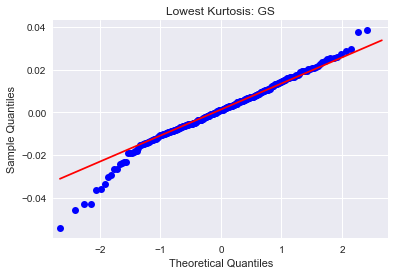

In [114]:
sm.qqplot(d30lrnh['GS'], line='q')       # line thru quartiles
plt.title('Lowest Kurtosis: GS')
plt.show()

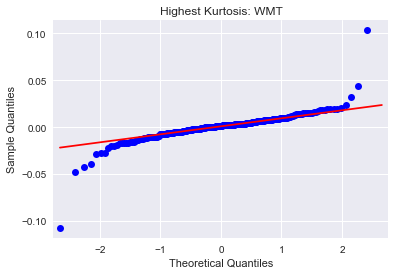

In [115]:
sm.qqplot(d30lrnh['WMT'], line='q')       # line thru quartiles
plt.title('Highest Kurtosis: WMT')
plt.show()

Examining the QQ-plots, we can see that the tails certainly deviate from a normal distribution as they are much fatter than the GS case.

## Part (i)
You can plot a time series in a DataFrame very easily using the .plot() method.  Create a DataFrame named d4PrevYrClose containing closing prices for just four stocks: the stock with the lowest mean log return, the stock with the highest mean log return, the stock with the lowest standard deviation of log returns, and the stock with the highest excess kurtosis.  Plot these with d4PrevYrClose.plot().  Now, create a DataFrame named d4ScaledClose in which the closing prices of the four stocks are scaled so that they all start at 100.  Plot the scaled DataFrame.  Can you say anything about the differences in shape among these time series?  (These plots include holidays, but for this visual inspection there are too few holidays to matter.)


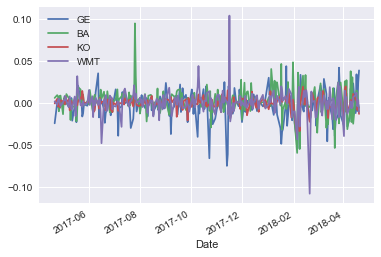

In [116]:
# Lowest  Mean : GE
# Highest Mean : BA
# Lowest  Std  : KO
# Highest Kurt : WMT
d4PrevYrClose = d30lrnh[['GE','BA','KO','WMT']]
d4PrevYrClose.plot()

The time-series definitely correspond to the company's description (i.e. highest kurtosis, lowest mean, etc.) For example, WMT has insanely high peaks compared to the other series and its own, which explains such a high kurtosis. Similarly, BA has the highest mean and this is suggested by the series because it is generally more positive than the other series. 

In [117]:
# Init prices
init_prices = d30PrevYrClose[['GE','BA','KO','WMT']].iloc[0,:]
scaling_factor = 100 / np.array(init_prices)

# Populate d4SacledClose dataframe
d4ScaledClose = pd.DataFrame()
for i, col in enumerate(d30PrevYrClose[['GE','BA','KO','WMT']].columns):
    d4ScaledClose[col] = d30PrevYrClose[['GE','BA','KO','WMT']].iloc[:,i]*scaling_factor[i]

In [118]:
d4ScaledClose.head()

,GE,BA,KO,WMT
Date,,,,
2017-04-20,100.000000,100.000000,100.000000,100.000000
2017-04-21,97.621407,100.602342,99.953586,100.187166
2017-04-24,97.621407,101.539320,100.440938,99.973262
2017-04-25,97.291047,102.348020,100.046414,100.334225
2017-04-26,96.663363,101.344116,100.348109,100.842246


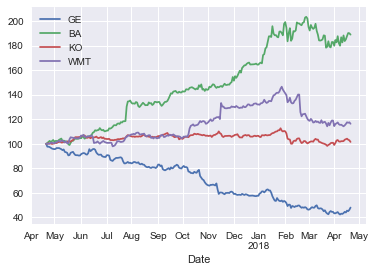

In [119]:
d4ScaledClose.plot()

We can make some eye-ball remarks about the shapes of the time-series. For example, <br>
<ul>
    <li>BA must have had a good year for it it is the highest and has periods of very steep increase, which explains why it has the higest average.</li>
    <li>GE has had the worst year (which is certainly true) and has been going down the steepest. This explains why it has the lowest average</li>
    <li>KO has had a very neutral year with nearly no volatility, which explains why it is the lowest standard deviation.</li>
    <li>WMT ended the year nearly the same as it started, but it had a lot of volatility/fluctuation in the stock price durin September to February, both good and bad fluctuations. Hence, this expalins why it has such high kurtosis</li>
</ul> 

## Part (j)
Daily log returns are easy to convert to annual log returns, simply by multiplying the daily log returns by the number of trading days in a year.  Define a Series mean_an_lr that contains the annualized mean log returns from d30lrnh.  Confirm for BA, GS, MSFT, and INTC that the 2017-04-20 price with the annualized mean log return applied for one year yields the 2018-04-20 price.


In [120]:
mean_an_lr = 252*d30lrnh.mean()

In [121]:
mean_an_lr

AAPL     0.151379
AXP      0.230763
BA       0.635966
BRK.A    0.194051
CAT      0.481779
CSCO     0.294890
CVX      0.153742
DIS     -0.135537
GE      -0.733254
GS       0.144500
HD       0.174141
IBM     -0.113403
INTC     0.353658
JNJ      0.038551
JPM      0.264654
KO       0.014972
MCD      0.175079
MMM      0.130237
MRK     -0.061314
MSFT     0.371827
NKE      0.158548
PFE      0.082183
PG      -0.190979
TRV      0.140698
UNH      0.315024
UTX      0.077163
V        0.309387
VZ      -0.010591
WMT      0.150860
XOM     -0.025125
dtype: float64

In [122]:
def pretty_print(stock, final_price, annualized_logret):
    
    if len(stock) == 2:
        out_str = "{}  {:>12}  {:13}".format(stock, final_price, annualized_logret)
    else:
        out_str = "{}  {:>10}  {:13}".format(stock, final_price, annualized_logret)
        
    print(out_str)

print("{}  {:>7} {:<5}".format("Stock", "Final_Price", "Using_AnnLogRet"))
print("-"*34)
for stock in confirmation_list:
    
    pretty_print(stock, d30PrevYrClose.loc['2018-04-20', stock].round(3), 
                 (d30PrevYrClose.loc['2017-04-20', stock]*np.exp(mean_an_lr[stock])).round(3))
    
    

Stock  Final_Price Using_AnnLogRet
----------------------------------
BA        338.67         338.67
GS        251.96         251.96
MSFT        95.0           95.0
INTC       51.53          51.53
